<a href="https://colab.research.google.com/github/ev1025/codestates-project4/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. 관심분야**
- 패션은 정말 사소한 디테일 하나에 옷이 잘팔리고 팔리지 않고가 결정 되기 때문에 의류의 다양한 특징들을 잘 추출해서 좋은 옷을 많이 알리고 싶다.

**2. 데이터 선정이유**
- 대부분의 패션 데이터들이 일단 크기가 방대하여 현실적으로 시도가 불가능해서 좋은 자료가 있으나, 일단 시도부터 해보자는 마음으로 fashion-mnist를 선택하였습니다.
- 패션은 단추나 문양 하나만 바뀌어도 다른 것이 되기 때문에 인간이 직접 구분하는 것에는 한계가 있어서 기계로 대체하면 훨씬 효율적일 것이라고 생각했습니다.

**3. 가설수립**
- SNS나 연예기사, 패션쇼 등을 통해서 패션의 트렌드분석
- 이미지를 입력했을 때, 이미지에 있는 옷의 색,질감,종류 등을 분석
- 위에서 분석한 자료를 바탕으로 비슷한 옷이나 잘 어울리는 옷을 추천

**4. 전처리, 딥러닝**   
**5. 모델검증**   
**6. 느낀점 한계점**   

# cnn

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization, Conv2D, Conv2DTranspose, MaxPooling2D
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing import image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras
import keras

import os

In [ ]:
np.random.seed(42)
tf.random.set_seed(42)

In [ ]:
# 데이터 불러오기
(X_train,y_train),(X_test, y_test) = fashion_mnist.load_data()
print(f"X_train : {X_train.shape}, X_test : {X_test.shape}")

4422102/4422102 [==============================] - 0s 0us/step
X_train : (60000, 28, 28), X_test : (10000, 28, 28)


In [ ]:
# 모델 정규화(Softmax)
X_train = X_train / 255.
X_test = X_test /255.

In [ ]:
# validation 분류
X_train,X_val, y_train,y_val = train_test_split(X_train, y_train, random_state=42, test_size=0.25)
print(X_train.shape, X_val.shape)

(45000, 28, 28) (15000, 28, 28)


In [ ]:
# 라벨 개수
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
# 특징 추출을 위한 모델링
cnn_model = Sequential()
cnn_model.add(Conv2D(filters=32, kernel_size=(3, 3),      
                     input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Conv2D(filters=64, kernel_size=(3, 3),      
                     input_shape=(28,28,1), activation='relu', padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(MaxPooling2D(pool_size=(2, 2)))
cnn_model.add(Dropout(0.2))

cnn_model.add(Flatten())
cnn_model.add(Dense(units=128, activation='relu'))
cnn_model.add(Dropout(0.2))
cnn_model.add(Dense(units=10, activation='softmax'))

In [ ]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 14, 14, 64)       2

In [ ]:
cnn_model.compile(optimizer='adam',
                  loss = 'sparse_categorical_crossentropy',
                  metrics='acc'
                  )

In [ ]:
checkpoint_filepath = "cnn_1.hdf5"

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)

In [ ]:
cnn_best = tf.keras.callbacks.ModelCheckpoint(
    filepath = checkpoint_filepath,
    monitor = 'val_loss',
    save_best_only = True,
    save_weight_only = True,
    mode = 'auto',
    save_freq='epoch'
)

In [ ]:
cnn_1 = cnn_model.fit(X_train,y_train,
                      batch_size=32,
                      epochs = 20,
                      validation_data = (X_val, y_val),
                      callbacks=[early_stop, cnn_best]
                      )

Epoch 1/20
1407/1407 [==============================] - 18s 5ms/step - loss: 0.4980 - acc: 0.8213 - val_loss: 0.3609 - val_acc: 0.8715
Epoch 2/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.3359 - acc: 0.8779 - val_loss: 0.2728 - val_acc: 0.8987
Epoch 3/20
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2957 - acc: 0.8906 - val_loss: 0.2663 - val_acc: 0.8999
Epoch 4/20
1407/1407 [==============================] - 12s 9ms/step - loss: 0.2701 - acc: 0.9010 - val_loss: 0.2830 - val_acc: 0.8971
Epoch 5/20
1407/1407 [==============================] - 13s 9ms/step - loss: 0.2576 - acc: 0.9051 - val_loss: 0.2625 - val_acc: 0.9064
Epoch 6/20
1407/1407 [==============================] - 10s 7ms/step - loss: 0.2409 - acc: 0.9105 - val_loss: 0.2589 - val_acc: 0.9030
Epoch 7/20
1407/1407 [==============================] - 7s 5ms/step - loss: 0.2305 - acc: 0.9136 - val_loss: 0.2855 - val_acc: 0.9018
Epoch 8/20
1407/1407 [==============================] - 7s

In [ ]:
cnn_model.load_weights(checkpoint_filepath)

In [ ]:
cnn_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.2516 - acc: 0.9211


[0.25157713890075684, 0.9211000204086304]

In [ ]:
# train 라벨
label_train = y_train
label_train = pd.DataFrame(label_train)
label_train = label_train.replace(0,'Top').replace(1,'pant').replace(2,'pullover').replace(3,'dress').replace(4,'coat').replace(5,'Sandals').replace(6,'Shirt').replace(7,'Sneaker').replace(8,'Bag').replace(9,'Ankle Boots')

# test 라벨
label_test = y_test
label_test = pd.DataFrame(label_test)
label_test = label_test.replace(0,'Top').replace(1,'pant').replace(2,'pullover').replace(3,'dress').replace(4,'coat').replace(5,'Sandals').replace(6,'Shirt').replace(7,'Sneaker').replace(8,'Bag').replace(9,'Ankle Boots')

# 목록
labels = ['TOP','Pants','Pullover','Dress','Coat','Sandals','Shirt','Sneaker','Bag','Ankle Boots']
labels = pd.DataFrame(labels)
labels

,0
0,TOP
1,Pants
2,Pullover
3,Dress
4,Coat
5,Sandals
6,Shirt
7,Sneaker
8,Bag
9,Ankle Boots


In [ ]:
# 샘플 테스트
deep_dir = '/content/drive/MyDrive/Colab Notebooks/deep'

files = os.listdir(deep_dir)
files

['pullov_noun_002_29547.jpg',
 '4VDTE3GKZ72X6H3XL6DZQRB7G4.jpg',
 'licensed-image.jpg']

In [ ]:
# rgb데이터를 흑백으로 변경(mnist는 1차원이기 때문에 기본사진의 3차원을 1차원으로 변경해주어야함)
def rgb2gray(rgb):
    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
    return gray

In [ ]:
def load_and_preprocessing(base_dir, name, model):

    image_path = base_dir+'/'+name
    image =  tf.keras.utils.load_img(image_path, target_size=(28,28))
    input_arr = tf.keras.utils.img_to_array(image) / 255.
    input_arr = rgb2gray(input_arr)
    
    plt.imshow(input_arr)
    plt.show()
    
    input_arr = np.array([input_arr])
    predictions = model.predict(input_arr)
    predict_class = np.argmax(predictions, axis=1) 
    print(labels.iloc[predict_class[0]])

    return predict_class[0]

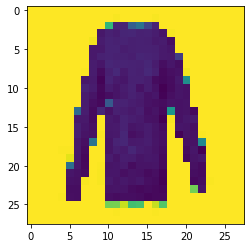

1/1 [==============================] - 0s 18ms/step
0    Dress
Name: 3, dtype: object


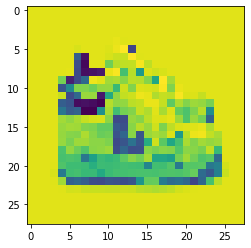

1/1 [==============================] - 0s 16ms/step
0    Bag
Name: 8, dtype: object


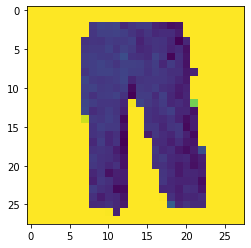

1/1 [==============================] - 0s 16ms/step
0    Bag
Name: 8, dtype: object


In [ ]:
predict_class = [load_and_preprocessing(deep_dir, filename, cnn_model) for filename in files]

**예측값 확인**

In [ ]:
y_pred = cnn_model.predict(X_test).round(2)
y_pred_label = list(map(np.argmax, y_pred))

313/313 [==============================] - 1s 2ms/step


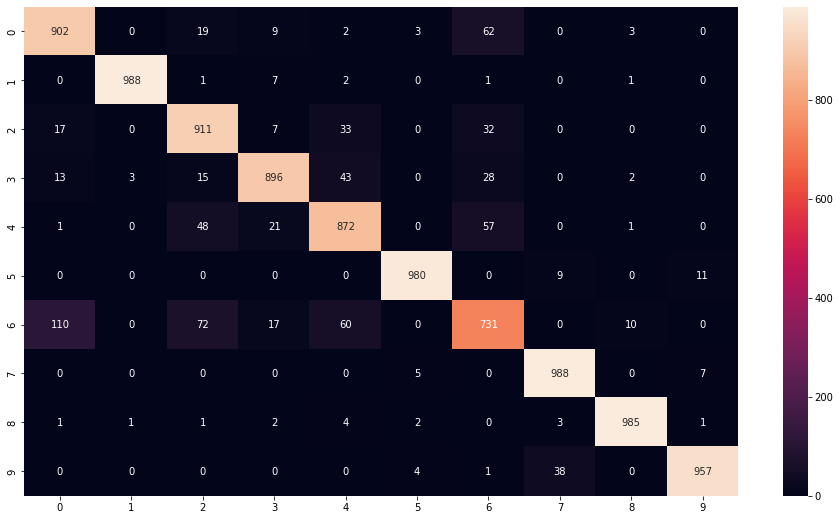

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

plt.figure(figsize = (16,9))

cm = confusion_matrix(y_test,y_pred_label)

sns.heatmap(cm , annot = True,fmt = 'd')

# 레즈넷


In [ ]:
!pip install git+https://github.com/tensorflow/examples.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/tensorflow/examples.git to /tmp/pip-req-build-txhhp4oe
  Running command git clone -q https://github.com/tensorflow/examples.git /tmp/pip-req-build-txhhp4oe
  Created wheel for tensorflow-examples: filename=tensorflow_examples-2741b9ea31622676451e2ce1414d233de45f915f_-py3-none-any.whl size=299717 sha256=c1206a87aa568b3cb5e4295dfd688e4b7a4ea7fc58b3335b9db68fcf795e0a9c
  Stored in directory: /tmp/pip-ephem-wheel-cache-kbxiin0e/wheels/4e/f5/c2/bfe75b834c9028b2529023bf74541c46ead531b513a8010d21
Failed to build tensorflow-examples
    Running setup.py install for tensorflow-examples ... done
  DEPRECATION: tensorflow-examples was installed using the legacy 'setup.py install' method, because a wheel could not be built for it. A possible replacement is to fix the wheel build issue reported above. You can find discussion regarding this at https://github.com/pypa/pip/i

In [ ]:
import tensorflow as tf

from tensorflow_examples.models.pix2pix import pix2pix


import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

resnet_dir = '/content/drive/MyDrive/소피스트케이티드'
train_file = os.listdir(resnet_dir)

test_dir = '/content/drive/MyDrive/'
test_file = os.listdir(test_dir)

In [ ]:
def preprocessing(base_dir, name):

    image_path = base_dir+'/'+name
    image =  tf.keras.utils.load_img(image_path, target_size=(128,128))
    input_arr = tf.keras.utils.img_to_array(image) / 255.
    input_arr = np.array(input_arr)
    
    return input_arr

In [ ]:
import numpy as np
train = [preprocessing(resnet_dir, filename) for filename in train_file]

In [ ]:
# 숫자번째 데이터 함수에 넣어서 확인(실제로는 2로 설정하면 2개의 데이터를 불러오는데 마지막꺼만 저장되니까..)
for image in train:
    sample_image = image

display([sample_image])

In [ ]:
base_model = tf.keras.applications.MobileNetV2(input_shape=[128, 128, 3], include_top=False)# 분류기제거

layer_names = [
    'block_1_expand_relu',   # 64x64 input/stride
    'block_3_expand_relu',   # 32x32
    'block_6_expand_relu',   # 16x16
    'block_13_expand_relu',  # 8x8
    'block_16_project',      # 4x4
]
# get_layer(name) 이름에 해당하는 레이어 가져오기
layers = [base_model.get_layer(name).output for name in layer_names]

down_stack = tf.keras.Model(inputs=base_model.input, outputs=layers)

down_stack.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [ ]:
up_stack = [
    pix2pix.upsample(512, 3),  # 4x4 -> 8x8
    pix2pix.upsample(256, 3),  # 8x8 -> 16x16
    pix2pix.upsample(128, 3),  # 16x16 -> 32x32
    pix2pix.upsample(64, 3),   # 32x32 -> 64x64
]

In [ ]:
def unet_model(output_channels):
    """
    모델을 정의하는 함수입니다.
    """
    inputs = tf.keras.layers.Input(shape=[128, 128, 3])
    x = inputs

    # Downsampling
    skips = down_stack(x)
    x = skips[-1]                # x = 다운샘플 마지막층
    skips = reversed(skips[:-1]) # skips = 다운샘플층을 거꾸로 뒤집은 리스트

    # Upsampling
    for up, skip in zip(up_stack, skips): # 업샘플링과 다운샘플링을 뒤집은 형태
        x = up(x)                         # 업샘플링에 다운샘플링 마지막층을 연결
        
        concat = tf.keras.layers.Concatenate()  
        x = concat([x, skip])                  # Downsampling 결과를 Concatenate 해줍니다.(기울기소실 예방)

    # 출력되는 이미지 크기를 동일하게 하기 위해 마지막 층을 구현합니다.
    last = tf.keras.layers.Conv2DTranspose(output_channels, 
                                           3, 
                                           padding='same',
                                           strides=2        )  # 마지막층 인풋 64x64 -> 128x128

    x = last(x)

    return tf.keras.Model(inputs=inputs, outputs=x)

In [ ]:
OUTPUT_CHANNELS=3
model = unet_model(OUTPUT_CHANNELS)

In [ ]:
model.compile(optimizer='adam',
              # 출력값이 nomalize되어 있으면(softmax처럼) False 아니면 nomalize되어있지 않으면True
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 model (Functional)             [(None, 64, 64, 96)  1841984     ['input_2[0][0]']                
                                , (None, 32, 32, 14                                               
                                4),                                                               
                                 (None, 16, 16, 192                                               
                                ),                                                          

In [ ]:
def load_and_preprocessing(base_dir, name, model):

    image_path = base_dir+'/'+name
    image =  tf.keras.utils.load_img(image_path, target_size=(128,128))
    input_arr = tf.keras.utils.img_to_array(image) / 255.
    
    plt.imshow(input_arr)
    plt.show()
    
    input_arr = np.array([input_arr])
    predictions = model.predict(input_arr)
    predict_class = np.argmax(predictions, axis=1) 
    print(labels.iloc[predict_class[0]])

    return predict_class[0]

# 체크포인트

In [ ]:
# # 파라미터 저장 경로를 설정하는 코드입니다.
# checkpoint_filepath = "FMbest.hdf5"

# early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1)


In [ ]:
# save_best = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath, monitor='val_loss', verbose=1, save_best_only=True,
#     save_weights_only=True, mode='auto', save_freq='epoch', options=None)

In [ ]:
# model.fit(X_train, y_train, batch_size=32, epochs=30, verbose=1, 
#           validation_data=(X_test,y_test), 
#           callbacks=[early_stop, save_best])

In [ ]:
# # 모델 불러와서 가중치 계산
# model.load_weights(checkpoint_filepath)